# Metode Bining (Diskritisasi)

## Definisi

Binning adalah salah satu metode dalam diskritisasi data numerik, yaitu proses mengelompokkan nilai-nilai kontinu (bilangan riil) ke dalam beberapa interval atau kategori (bin). Tujuan utamanya adalah menyederhanakan data, mengurangi noise, dan mempermudah analisis, terutama pada algoritma yang bekerja lebih baik dengan data kategorikal seperti decision tree.

## Langkah-Langkah Bining Diskritisasi

1.   **Equal Width Binning**

Equal Width Binning adalah metode diskritisasi di mana rentang nilai data kontinu dibagi menjadi beberapa interval (bin) yang memiliki lebar (width) yang sama. Setiap bin mencakup rentang nilai yang sama besar, meskipun jumlah data dalam tiap bin bisa berbeda. Mulanya hitung lebar bin, kemudian urutkan data dan Setiap nilai dalam data kemudian dikelompokkan ke bin berdasarkan batas intervalnya.

Metode ini membagi data ke dalam bin seperti berikut:

- $[
text{Lebar Bin} = \frac{\text{Maksimum Data} - \text{Minimum Data}}{\text{Jumlah Bin}}
$]



2. **Equal-Frequency Binning**

Equal-Frequency Binning adalah metode diskritisasi di mana data kontinu dibagi ke dalam beberapa bin (kategori), dan setiap bin memiliki jumlah data (frekuensi) yang sama atau hampir sama.
Berbeda dengan Equal-Width Binning yang membagi data berdasarkan rentang nilai,

* Equal-Frequency Binning membagi data berdasarkan jumlah data dalam setiap bin. Nilai-nilai data diurutkan terlebih dahulu.

*   Kemudian dibagi ke dalam bin sesuai jumlah data.
*   Cocok untuk data yang tidak terdistribusi merata, agar tiap bin tetap berisi cukup data.

Rumus:

Jika:
- $( n $) = jumlah total data
- $( k $) = jumlah bin

Maka:

- $[
\text{Jumlah Data per Bin} \approx \frac{n}{k}
$]


## Implementasi Pada Data Iris Murni

### Install Library yang dibutuhkan

In [98]:
!pip install pymysql

In [99]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tabulate import tabulate
from matplotlib.patches import Patch
from sklearn.preprocessing import MinMaxScaler

### Ambil data Dari database MySQL melalui Aiven.io

In [100]:
import pymysql

# koneksi ke database mysql melalui aiven.io
DB_HOST = "mysql-131f3e28-fathanlearn-5ad0.i.aivencloud.com"
DB_PORT = 25962
DB_NAME = "defaultdb"
DB_USER = "avnadmin"
DB_PASS = "AVNS_hCKUXEhLqojSjCxujVo"

connect_2 = pymysql.connect(
    host=DB_HOST,
    port=DB_PORT,
    database=DB_NAME,
    user=DB_USER,
    password=DB_PASS,
    ssl={'ssl': {}}
)

data_mysql = connect_2.cursor()

# ambil data ke database
data_mysql.execute("SELECT * FROM iris_mysql.data_Iris LIMIT 10;")
data_db_sql = data_mysql.fetchall()


print("10 data dalam tabel data_iris")
for data2 in data_db_sql:
  print(data2)

10 data dalam tabel data_iris
(1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa')
(2, 4.9, 3.0, 1.4, 0.2, 'Iris-setosa')
(3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa')
(4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa')
(5, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa')
(6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa')
(7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa')
(8, 5.0, 3.4, 1.5, 0.2, 'Iris-setosa')
(9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa')
(10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa')


### Menampilkan Seluruh data pada Tabel dalam Database

In [101]:
data_mysql.execute("SELECT id, SepalLengthCM, SepalWidthCM, PetalLengthCM, PetalWidthCM, Species FROM iris_mysql.data_Iris;")

print("Kolom 'Species' berhasil dihapus atau tidak ditampilkan.")

data_remove_class = data_mysql.fetchall()


# print("10 data dalam tabel data_iris yang telah dihapus kolom Species atau tidak ditampilkan")
header = [desc[0] for desc in data_mysql.description]
print(tabulate(data_remove_class, headers=header, tablefmt='pretty'))

Kolom 'Species' berhasil dihapus atau tidak ditampilkan.
+-----+---------------+--------------+---------------+--------------+-----------------+
| id  | SepalLengthCM | SepalWidthCM | PetalLengthCM | PetalWidthCM |     Species     |
+-----+---------------+--------------+---------------+--------------+-----------------+
|  1  |      5.1      |     3.5      |      1.4      |     0.2      |   Iris-setosa   |
|  2  |      4.9      |     3.0      |      1.4      |     0.2      |   Iris-setosa   |
|  3  |      4.7      |     3.2      |      1.3      |     0.2      |   Iris-setosa   |
|  4  |      4.6      |     3.1      |      1.5      |     0.2      |   Iris-setosa   |
|  5  |      5.0      |     3.6      |      1.4      |     0.2      |   Iris-setosa   |
|  6  |      5.4      |     3.9      |      1.7      |     0.4      |   Iris-setosa   |
|  7  |      4.6      |     3.4      |      1.4      |     0.3      |   Iris-setosa   |
|  8  |      5.0      |     3.4      |      1.5      |     0.2 

### Proses Diskritisasi pada Setiap Fitur data Iris Menggunakan Naive Bayes

Dkistritisasi menggunakan Naive Bayes adalah sebuah proses mengubah data numerik menjadi data kategorikal dengan cara otomatis berdasarkan pola distribusi nilai, menggunakan algoritma K-Means

#### Langkah - Langkah Diskritisasi Menggunakan K-Means
##### 1. Pilih Fitur Numerik yang Akan Didiskretisasi
Untuk langkah pertama kita memilih merubah setiap fitur dari data numerik menjadi data Kategorikal, pada kasus ini kita mengubah setiap fitur pada data iris kecuali fitur specienya yang akan digunakan untuk klasifikasi nantinya.

##### 2. Tentukan Jumlah bin (kategori) pada setiap Fitur
Proses ini dilakukan untuk setiap data dalam fitur akan dikategorikan atau dipecah menjadi berapa class atau kelompok. Pada Naive Bayes kita menggunakan perhitungan inertia dan metode elbow. Metode atau perhitungan tersebut digunakan untuk menentukan seberapa dekat titik dengan centroidnya dan elbow untuk menentukan nilai k terbaik.

##### 3. Clustering pada Setiap Fitur
Contoh Clustering:

*   Fitur sepal_length memiliki nilai-nilai 4.3, 5.1, 6.2, dst.
*   K-Means akan mencari 3 "pusat kluster" (centroids), lalu mengelompokkan setiap nilai ke pusat terdekat.

Hasilnya:

- Setiap nilai sepal_length akan diklasifikasikan ke kluster 0, 1, atau 2.

Catatan:


*   K-Means menghitung jarak antar angka → jadi hanya cocok untuk data numerik.
*   K-Means bisa memberi label yang acak (kluster 0 bukan selalu “rendah”).


##### 4. Kemudian Label Hasil Kluster sebagai Kategorikal









#### Fitur Sepal Length

In [102]:
# data dari database diambil dan dimasukkan ke DataFrame
data = pd.DataFrame(data_remove_class, columns=["id", "SepalLengthCM", "SepalWidthCM", "PetalLengthCM", "PetalWidthCM", "Species"])

# Menghapus Kolom sepal length
data_sepalL = data.drop(columns=['id', "SepalWidthCM", "PetalLengthCM", "PetalWidthCM", "Species"])
print(tabulate(data_sepalL.head(10), headers=header, tablefmt='pretty'))

+----+---------------+
| id | SepalLengthCM |
+----+---------------+
| 0  |      5.1      |
| 1  |      4.9      |
| 2  |      4.7      |
| 3  |      4.6      |
| 4  |      5.0      |
| 5  |      5.4      |
| 6  |      4.6      |
| 7  |      5.0      |
| 8  |      4.4      |
| 9  |      4.9      |
+----+---------------+


#### Model Sepal Length

In [103]:
# mengambil data dalam database dan menghapus kolom id
k_means_C4_sepalL = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=250,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# latih model
k_means_C4_sepalL.fit(data_sepalL)

# ambil data,  label, dan inertia
labelC4_sepalL = k_means_C4_sepalL.labels_
centroidsC4_sepalL = k_means_C4_sepalL.cluster_centers_
InertiaC4_sepalL = k_means_C4_sepalL.inertia_

Initialization complete
Iteration 0, inertia 14.639999999999999.
Iteration 1, inertia 12.857035247580704.
Iteration 2, inertia 12.47161733705015.
Iteration 3, inertia 11.252706362728299.
Iteration 4, inertia 10.23520443912843.
Iteration 5, inertia 8.836983236289411.
Iteration 6, inertia 8.602354423292274.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 16.019999999999996.
Iteration 1, inertia 12.47161733705015.
Iteration 2, inertia 11.252706362728299.
Iteration 3, inertia 10.23520443912843.
Iteration 4, inertia 8.836983236289411.
Iteration 5, inertia 8.602354423292274.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 12.36.
Iteration 1, inertia 9.5789296123876.
Iteration 2, inertia 9.14749375.
Iteration 3, inertia 9.020729998072108.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 13.44999999999999.
Iteration 1, inertia 9.78162490119359.
Iteration 2, inertia 8.

####  Proses Diskritisasi menjadi 4 bin Data

In [104]:
# Proses memberi label pada setiap hasil Cluster
import pandas as pd
label_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
df = pd.DataFrame(data_sepalL, columns=['SepalLengthCM'])
df['ID'] = [f"ID{i+1:03}" for i in range(len(df))]
df['Cluster_sepalL'] = [label_map[label] for label in labelC4_sepalL]
for _, row in df.iterrows():
    print(f"ID: {row['ID']}, fitur: {row['SepalLengthCM']}, Cluster: {row['Cluster_sepalL']}")


ID: ID001, fitur: 5.1, Cluster: C
ID: ID002, fitur: 4.9, Cluster: C
ID: ID003, fitur: 4.7, Cluster: C
ID: ID004, fitur: 4.6, Cluster: C
ID: ID005, fitur: 5.0, Cluster: C
ID: ID006, fitur: 5.4, Cluster: A
ID: ID007, fitur: 4.6, Cluster: C
ID: ID008, fitur: 5.0, Cluster: C
ID: ID009, fitur: 4.4, Cluster: C
ID: ID010, fitur: 4.9, Cluster: C
ID: ID011, fitur: 5.4, Cluster: A
ID: ID012, fitur: 4.8, Cluster: C
ID: ID013, fitur: 4.8, Cluster: C
ID: ID014, fitur: 4.3, Cluster: C
ID: ID015, fitur: 5.8, Cluster: A
ID: ID016, fitur: 5.7, Cluster: A
ID: ID017, fitur: 5.4, Cluster: A
ID: ID018, fitur: 5.1, Cluster: C
ID: ID019, fitur: 5.7, Cluster: A
ID: ID020, fitur: 5.1, Cluster: C
ID: ID021, fitur: 5.4, Cluster: A
ID: ID022, fitur: 5.1, Cluster: C
ID: ID023, fitur: 4.6, Cluster: C
ID: ID024, fitur: 5.1, Cluster: C
ID: ID025, fitur: 4.8, Cluster: C
ID: ID026, fitur: 5.0, Cluster: C
ID: ID027, fitur: 5.0, Cluster: C
ID: ID028, fitur: 5.2, Cluster: C
ID: ID029, fitur: 5.2, Cluster: C
ID: ID030, fit

#### Fitur Sepal Width

In [105]:
# Menghapus Kolom sepal width
data_sepalW = data.drop(columns=['id', "SepalLengthCM", "PetalLengthCM", "PetalWidthCM", "Species"])
print(tabulate(data_sepalW.head(10), headers="keys", tablefmt='pretty'))

+---+--------------+
|   | SepalWidthCM |
+---+--------------+
| 0 |     3.5      |
| 1 |     3.0      |
| 2 |     3.2      |
| 3 |     3.1      |
| 4 |     3.6      |
| 5 |     3.9      |
| 6 |     3.4      |
| 7 |     3.4      |
| 8 |     2.9      |
| 9 |     3.1      |
+---+--------------+


### Model Sepal Width

In [106]:
# mengambil data dalam database dan menghapus kolom id
k_means_sepalW = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=250,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# latih model
k_means_sepalW.fit(data_sepalL)

# ambil data,  label, dan inertia
labelC3_sepalW = k_means_sepalW.labels_
centroidsC3_sepalW = k_means_sepalW.cluster_centers_
InertiaC3_sepalW = k_means_sepalW.inertia_

Initialization complete
Iteration 0, inertia 32.10000000000001.
Iteration 1, inertia 27.377337616492067.
Iteration 2, inertia 22.91004658203123.
Iteration 3, inertia 21.433712720955704.
Iteration 4, inertia 18.790085205358807.
Iteration 5, inertia 16.824578310314585.
Iteration 6, inertia 16.355417066085693.
Iteration 7, inertia 16.347691293088193.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 17.02.
Iteration 1, inertia 15.86638085522973.
Iteration 2, inertia 15.816622672964714.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 17.970000000000013.
Iteration 1, inertia 16.131932700865576.
Iteration 2, inertia 15.816622672964714.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 22.360000000000003.
Iteration 1, inertia 20.568226890951347.
Iteration 2, inertia 18.790085205358807.
Iteration 3, inertia 16.824578310314585.
Iteration 4, inertia 16.355417066085693.
Ite

####  Proses Diskritisasi menjadi 3 bin Data

In [107]:
# Proses memberi label pada setiap hasil Cluster
import pandas as pd
# Mapping label angka ke huruf
label_map_2 = {0: 'A', 1: 'B', 2: 'C'}

# Tambahkan kolom ID dan label huruf
df = pd.DataFrame(data_sepalW, columns=['SepalWidthCM'])
df['ID'] = [f"ID{i+1:03}" for i in range(len(df))]
df['Cluster_sepalW'] = [label_map_2[label] for label in labelC3_sepalW]

# Cetak hasilnya
for _, row in df.iterrows():
    print(f"ID: {row['ID']}, fitur: {row['SepalWidthCM']}, Cluster: {row['Cluster_sepalW']}")

ID: ID001, fitur: 3.5, Cluster: B
ID: ID002, fitur: 3.0, Cluster: B
ID: ID003, fitur: 3.2, Cluster: B
ID: ID004, fitur: 3.1, Cluster: B
ID: ID005, fitur: 3.6, Cluster: B
ID: ID006, fitur: 3.9, Cluster: B
ID: ID007, fitur: 3.4, Cluster: B
ID: ID008, fitur: 3.4, Cluster: B
ID: ID009, fitur: 2.9, Cluster: B
ID: ID010, fitur: 3.1, Cluster: B
ID: ID011, fitur: 3.7, Cluster: B
ID: ID012, fitur: 3.4, Cluster: B
ID: ID013, fitur: 3.0, Cluster: B
ID: ID014, fitur: 3.0, Cluster: B
ID: ID015, fitur: 4.0, Cluster: C
ID: ID016, fitur: 4.4, Cluster: C
ID: ID017, fitur: 3.9, Cluster: B
ID: ID018, fitur: 3.5, Cluster: B
ID: ID019, fitur: 3.8, Cluster: C
ID: ID020, fitur: 3.8, Cluster: B
ID: ID021, fitur: 3.4, Cluster: B
ID: ID022, fitur: 3.7, Cluster: B
ID: ID023, fitur: 3.6, Cluster: B
ID: ID024, fitur: 3.3, Cluster: B
ID: ID025, fitur: 3.4, Cluster: B
ID: ID026, fitur: 3.0, Cluster: B
ID: ID027, fitur: 3.4, Cluster: B
ID: ID028, fitur: 3.5, Cluster: B
ID: ID029, fitur: 3.4, Cluster: B
ID: ID030, fit

#### Fitur Petal Length

In [108]:
# Menghapus Kolom petal length
data_PetalL = data.drop(columns=['id', "SepalLengthCM", "SepalWidthCM", "PetalWidthCM", "Species"])
print(tabulate(data_PetalL.head(10), headers="keys", tablefmt='pretty'))

+---+---------------+
|   | PetalLengthCM |
+---+---------------+
| 0 |      1.4      |
| 1 |      1.4      |
| 2 |      1.3      |
| 3 |      1.5      |
| 4 |      1.4      |
| 5 |      1.7      |
| 6 |      1.4      |
| 7 |      1.5      |
| 8 |      1.4      |
| 9 |      1.5      |
+---+---------------+


#### Model Petal Length

In [109]:
# mengambil data dalam database dan menghapus kolom id
k_means_petalL = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=250,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# latih model
k_means_petalL.fit(data_PetalL)

# ambil data,  label, dan inertia
labelC4_petalL = k_means_petalL.labels_
centroidsC4_petalL = k_means_petalL.cluster_centers_
InertiaC4_petalL = k_means_petalL.inertia_

Initialization complete
Iteration 0, inertia 13.280000000000006.
Iteration 1, inertia 12.641048502146427.
Iteration 2, inertia 12.574911111111104.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 16.659999999999997.
Iteration 1, inertia 15.040783361443747.
Iteration 2, inertia 14.268307889979337.
Iteration 3, inertia 14.088603401797174.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 18.189999999999994.
Iteration 1, inertia 14.400939487059354.
Iteration 2, inertia 13.049860776947156.
Iteration 3, inertia 12.73917135170525.
Iteration 4, inertia 12.574911111111104.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 16.73.
Iteration 1, inertia 14.761725013583463.
Iteration 2, inertia 13.53118835059171.
Iteration 3, inertia 13.049860776947156.
Iteration 4, inertia 12.73917135170525.
Iteration 5, inertia 12.574911111111104.
Converged at iteration 5: strict convergence

####  Proses Diskritisasi menjadi 4 bin Data

In [110]:
# Proses memberi label pada setiap hasil Cluster
import pandas as pd
# Mapping label angka ke huruf
label_map_3 = {0: 'A', 1: 'B', 2: 'C', 3:'D'}

# Tambahkan kolom ID dan label huruf
df = pd.DataFrame(data_PetalL, columns=['PetalLengthCM'])
df['ID'] = [f"ID{i+1:03}" for i in range(len(df))]
df['Cluster_petalL'] = [label_map_3[label] for label in labelC4_petalL]

# Cetak hasilnya
for _, row in df.iterrows():
    print(f"ID: {row['ID']}, fitur: {row['PetalLengthCM']}, Cluster: {row['Cluster_petalL']}")

ID: ID001, fitur: 1.4, Cluster: B
ID: ID002, fitur: 1.4, Cluster: B
ID: ID003, fitur: 1.3, Cluster: B
ID: ID004, fitur: 1.5, Cluster: B
ID: ID005, fitur: 1.4, Cluster: B
ID: ID006, fitur: 1.7, Cluster: B
ID: ID007, fitur: 1.4, Cluster: B
ID: ID008, fitur: 1.5, Cluster: B
ID: ID009, fitur: 1.4, Cluster: B
ID: ID010, fitur: 1.5, Cluster: B
ID: ID011, fitur: 1.5, Cluster: B
ID: ID012, fitur: 1.6, Cluster: B
ID: ID013, fitur: 1.4, Cluster: B
ID: ID014, fitur: 1.1, Cluster: B
ID: ID015, fitur: 1.2, Cluster: B
ID: ID016, fitur: 1.5, Cluster: B
ID: ID017, fitur: 1.3, Cluster: B
ID: ID018, fitur: 1.4, Cluster: B
ID: ID019, fitur: 1.7, Cluster: B
ID: ID020, fitur: 1.5, Cluster: B
ID: ID021, fitur: 1.7, Cluster: B
ID: ID022, fitur: 1.5, Cluster: B
ID: ID023, fitur: 1.0, Cluster: B
ID: ID024, fitur: 1.7, Cluster: B
ID: ID025, fitur: 1.9, Cluster: B
ID: ID026, fitur: 1.6, Cluster: B
ID: ID027, fitur: 1.6, Cluster: B
ID: ID028, fitur: 1.5, Cluster: B
ID: ID029, fitur: 1.4, Cluster: B
ID: ID030, fit

#### Fitur Petal Width

In [111]:
# Menghapus Kolom petal width
data_PetalW = data.drop(columns=['id', "SepalLengthCM", "SepalWidthCM", "PetalLengthCM", "Species"])
print(tabulate(data_PetalW.head(10), headers="keys", tablefmt='pretty'))

+---+--------------+
|   | PetalWidthCM |
+---+--------------+
| 0 |     0.2      |
| 1 |     0.2      |
| 2 |     0.2      |
| 3 |     0.2      |
| 4 |     0.2      |
| 5 |     0.4      |
| 6 |     0.3      |
| 7 |     0.2      |
| 8 |     0.2      |
| 9 |     0.1      |
+---+--------------+


#### Model Petal Width

In [112]:
# mengambil data dalam database dan menghapus kolom id
k_means_petalW = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=250,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# latih model
k_means_petalW.fit(data_PetalL)

# ambil data,  label, dan inertia
labelC3_petalW = k_means_petalW.labels_
centroidsC3_petalW = k_means_petalW.cluster_centers_
InertiaC3_petalW = k_means_petalW.inertia_

Initialization complete
Iteration 0, inertia 56.61999999999999.
Iteration 1, inertia 30.908672.
Iteration 2, inertia 26.681840396601768.
Iteration 3, inertia 25.14124289358229.
Iteration 4, inertia 24.86029803921569.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 30.500000000000018.
Iteration 1, inertia 24.86029803921569.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 38.30000000000001.
Iteration 1, inertia 29.152200764952116.
Iteration 2, inertia 26.000106249999998.
Iteration 3, inertia 25.14124289358229.
Iteration 4, inertia 24.86029803921569.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 27.779999999999998.
Iteration 1, inertia 24.86029803921569.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 27.640000000000022.
Iteration 1, inertia 24.86029803921569.
Converged at iteration 1: strict convergence.
Initializati

####  Proses Diskritisasi menjadi 3 bin Data

In [113]:
# Proses memberi label pada setiap hasil Cluster
import pandas as pd
# Mapping label angka ke huruf
label_map_4 = {0: 'A', 1: 'B', 2: 'C'}

# Tambahkan kolom ID dan label huruf
df = pd.DataFrame(data_PetalW, columns=['PetalWidthCM'])
df['ID'] = [f"ID{i+1:03}" for i in range(len(df))]
df['Cluster_petalW'] = [label_map_4[label] for label in labelC3_petalW]

# Cetak hasilnya
for _, row in df.iterrows():
    print(f"ID: {row['ID']}, fitur: {row['PetalWidthCM']}, Cluster: {row['Cluster_petalW']}")

ID: ID001, fitur: 0.2, Cluster: B
ID: ID002, fitur: 0.2, Cluster: B
ID: ID003, fitur: 0.2, Cluster: B
ID: ID004, fitur: 0.2, Cluster: B
ID: ID005, fitur: 0.2, Cluster: B
ID: ID006, fitur: 0.4, Cluster: B
ID: ID007, fitur: 0.3, Cluster: B
ID: ID008, fitur: 0.2, Cluster: B
ID: ID009, fitur: 0.2, Cluster: B
ID: ID010, fitur: 0.1, Cluster: B
ID: ID011, fitur: 0.2, Cluster: B
ID: ID012, fitur: 0.2, Cluster: B
ID: ID013, fitur: 0.1, Cluster: B
ID: ID014, fitur: 0.1, Cluster: B
ID: ID015, fitur: 0.2, Cluster: B
ID: ID016, fitur: 0.4, Cluster: B
ID: ID017, fitur: 0.4, Cluster: B
ID: ID018, fitur: 0.3, Cluster: B
ID: ID019, fitur: 0.3, Cluster: B
ID: ID020, fitur: 0.3, Cluster: B
ID: ID021, fitur: 0.2, Cluster: B
ID: ID022, fitur: 0.4, Cluster: B
ID: ID023, fitur: 0.2, Cluster: B
ID: ID024, fitur: 0.5, Cluster: B
ID: ID025, fitur: 0.2, Cluster: B
ID: ID026, fitur: 0.2, Cluster: B
ID: ID027, fitur: 0.4, Cluster: B
ID: ID028, fitur: 0.2, Cluster: B
ID: ID029, fitur: 0.2, Cluster: B
ID: ID030, fit

#### Menampilkan setiap Fitur yang telah di Dikritisasi

In [114]:
# mengambil seluruh keys collection yang menampung nilai bin setiap fitur
data_id = data.drop(columns=['SepalLengthCM', "SepalWidthCM", "PetalLengthCM", "PetalWidthCM", "Species"])
df['id'] = data_id
data_species = data.drop(columns=['SepalLengthCM', "SepalWidthCM", "PetalLengthCM", "PetalWidthCM", "id"])
df['species'] = data_species
df['Cluster_sepalL'] = [label_map[label] for label in labelC4_sepalL]
df['Cluster_sepalW'] = [label_map_2[label] for label in labelC3_sepalW]
df['Cluster_petalL'] = [label_map_3[label] for label in labelC4_petalL]
df['Cluster_petalW'] = [label_map_4[label] for label in labelC3_petalW]
header = ['id','species','sepal_length', 'sepal_width', 'petal_length', 'petal_width']
print(tabulate(df[['id','species','Cluster_sepalL', 'Cluster_sepalW','Cluster_petalL', 'Cluster_petalW']].head(50), headers=header, tablefmt='pretty'))

+----+----+-------------+--------------+-------------+--------------+-------------+
|    | id |   species   | sepal_length | sepal_width | petal_length | petal_width |
+----+----+-------------+--------------+-------------+--------------+-------------+
| 0  | 1  | Iris-setosa |      C       |      B      |      B       |      B      |
| 1  | 2  | Iris-setosa |      C       |      B      |      B       |      B      |
| 2  | 3  | Iris-setosa |      C       |      B      |      B       |      B      |
| 3  | 4  | Iris-setosa |      C       |      B      |      B       |      B      |
| 4  | 5  | Iris-setosa |      C       |      B      |      B       |      B      |
| 5  | 6  | Iris-setosa |      A       |      B      |      B       |      B      |
| 6  | 7  | Iris-setosa |      C       |      B      |      B       |      B      |
| 7  | 8  | Iris-setosa |      C       |      B      |      B       |      B      |
| 8  | 9  | Iris-setosa |      C       |      B      |      B       |      B

### Klasifikasi Data yang telah Dikritisasi menggunakan Naive Bayes dan Decision Tree

#### Naive Bayes dengan Data Kategorikal

Naive Bayes merupakan metode yang digunakan untuk pengklasifikasian dengan tingkat keakuratan yang baik. Dalam algoritma ini, tidak memerlukan adnaya pemodelan maupun uji statistik dalam pengklasifikasian.


Naive Bayes memiliki pendekatan berdasarkan probabilitas sederhana yang dirancang agar dapat dipergunakan dengan asumsi antar variabel saling bebas atau independen. Keuntungan menggunakan metode ini yakni memiliki tingkat nilai eror yang didapat lebih rendah dalam suatu dataset yang besar, kecepatan akurasi lebih tinggi ketika diaplikasikan pada dataset yang jumlahnya besar.

#### Langkah - Langkah Klasifikasi Naive Bayes (Gaussian)

Naïve Bayes Gaussian digunakan ketika fitur yang digunakan dalam klasifikasi berupa **data numerik kontinu** dan diasumsikan mengikuti distribusi normal (Gaussian). Data numerik berarti nilai yang dapat diukur dan memiliki skala kontinu, seperti **tinggi badan, berat badan, suhu, atau usia**.

##### 1. Persiapan Data

Misalkan kita memiliki dataset dengan fitur numerik **X** dan ingin mengklasifikasikan ke dalam kelas **Y**:

- **X**: Fitur numerik (misalnya, tinggi badan, berat badan)
- **Y**: Label kelas (misalnya, "Laki-laki" atau "Perempuan")

##### 2. Hitung Prior Probability

Prior probability adalah probabilitas awal dari masing-masing kelas sebelum melihat fitur.

$$
P(Y) = \frac{N_Y}{N}
$$

Dimana:

- $(N_Y$) = Jumlah sampel dalam kelas \(Y\)
- $(N$) = Total jumlah sampel

##### 3. Hitung Parameter Distribusi Gaussian

Untuk setiap fitur $(X$) dalam kelas $(Y$), hitung **mean (rata-rata)** dan **variance (variansi)**:

###### a. Mean (Rata-rata)

$$
$mu_Y = \frac{1}{N_Y} \sum_{i=1}^{N_Y} X_i
$$

Dimana:

- $($mu_Y$) = Rata-rata fitur $(X$) dalam kelas $(Y$)

###### b. Variance (Variansi)

$$
$sigma_Y^2 = \frac{1}{N_Y} \sum_{i=1}^{N_Y} (X_i - \mu_Y)^2
$$

Dimana:

- $($sigma_Y^2$) = Variansi fitur $(X$) dalam kelas $(Y$)

##### 4. Hitung Likelihood dengan Distribusi Gaussian

Untuk setiap fitur $(X$), kita hitung probabilitasnya menggunakan fungsi **Gaussian**:

$$
P(X | Y) = \frac{1}{\sqrt{2 \pi \sigma_Y^2}} \exp \left( -\frac{(X - \mu_Y)^2}{2 \sigma_Y^2} \right)
$$

Dimana:

- $($sigma_Y^2$) = Variansi fitur $(X$) dalam kelas $(Y$)
- $($mu_Y$) = Mean fitur \(X\) dalam kelas \(Y\)

##### 5. Hitung Posterior Probability

Menggunakan **Teorema Bayes**, kita menghitung probabilitas posterior:

$$
P(Y | X) \propto P(X | Y) P(Y)
$$

Karena **P(X)** sama untuk semua kelas, kita cukup membandingkan:

$$
P(Y | X) = P(X_1 | Y) P(X_2 | Y) ... P(X_n | Y) P(Y)
$$

##### 6. Prediksi Kelas

Pilih kelas dengan probabilitas **posterior tertinggi**:

$$
Y^* = \arg\max_Y P(Y | X)
$$



##### Import Library yang Dibutuhkan

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


##### Pisahkan antara setiap Fitur dengan Target Setiap Class

In [116]:
fitur_kategorikal = ['Cluster_sepalL', 'Cluster_sepalW', 'Cluster_petalL', 'Cluster_petalW']
target_kelas = 'species'

X = df[fitur_kategorikal]
y = df[target_kelas]

##### Ubah Data Kategorikal Menjadi data Numerik jika Menggunakan Library CategoricalNB

Jadi library tersebut membutuhkan data numerik sebelum diproses misalnya menjadi 0, 1, dan 2.

In [117]:
# konversi data dari kategori menjadi numerik sesuai jumlah bin
data_konversi_numerikNB = OrdinalEncoder()
valueX_encoded = data_konversi_numerikNB.fit_transform(X)

df_valueX_encoded = pd.DataFrame(
    data_konversi_numerikNB.fit_transform(X),
    columns=X.columns,
    index=X.index
)

print(df_valueX_encoded)

     Cluster_sepalL  Cluster_sepalW  Cluster_petalL  Cluster_petalW
0               2.0             1.0             1.0             1.0
1               2.0             1.0             1.0             1.0
2               2.0             1.0             1.0             1.0
3               2.0             1.0             1.0             1.0
4               2.0             1.0             1.0             1.0
..              ...             ...             ...             ...
145             3.0             0.0             0.0             0.0
146             3.0             2.0             0.0             0.0
147             3.0             2.0             0.0             0.0
148             3.0             2.0             3.0             0.0
149             0.0             2.0             0.0             0.0

[150 rows x 4 columns]


##### Pisahkan Data yang mau digunakan untuk Training dan Testing

In [118]:
# split data untuk train sebesar 70% dan data test sebesar 30%
X_train, X_test, y_train, y_test = train_test_split(
    valueX_encoded, y, test_size=0.3, random_state=42, stratify = y
)

##### Latih Model Naive Bayes Kategorikal

Naive Bayes bekerja dengan menghitung kemungkinan (probabilitas) suatu data masuk ke dalam sebuah kelas, berdasarkan nilai-nilai fitur yang dimilikinya. Untuk data kategorikal, setiap fitur memiliki nilai diskrit, seperti "Merah", "Besar", atau "Ya/Tidak".

Pertama, algoritma ini menghitung seberapa sering setiap kelas muncul dalam data latih. Kemudian, untuk setiap fitur dan setiap kelas, dihitung berapa sering kombinasi tersebut terjadi. Misalnya, berapa kali fitur “warna = Merah” muncul pada kelas “Ya”.

Ketika ada data baru yang ingin diprediksi, Naive Bayes akan menghitung kemungkinan data itu termasuk ke setiap kelas, berdasarkan kombinasi nilai-nilai fitur yang dimilikinya. Nilai-nilai kemungkinan ini kemudian dibandingkan, dan kelas dengan kemungkinan tertinggi akan dipilih sebagai prediksi.

In [119]:
# model naive bayes kategori
modelNBKategori = CategoricalNB()
modelNBKategori.fit(X_train, y_train)

CategoricalNB()

##### Testing Data menggunakan Fitur X Testnya

##### Clustering Data pada Setiap Classnya

In [120]:
# menampilkan hasil clustering
# Daftar kolom yang ingin ditampilkan
y_pred_NB = modelNBKategori.predict(df_valueX_encoded)
df['Prediksi_NB'] = y_pred_NB
selected_cols = [
    'ID',
    'Cluster_sepalL', 'Cluster_sepalW',
    'Cluster_petalL', 'Cluster_petalW'
]
if 'Prediksi_NB' in df.columns:
    selected_cols.append('Prediksi_NB')
print(tabulate(df[selected_cols], headers='keys', tablefmt='pretty'))

+-----+-------+----------------+----------------+----------------+----------------+-----------------+
|     |  ID   | Cluster_sepalL | Cluster_sepalW | Cluster_petalL | Cluster_petalW |   Prediksi_NB   |
+-----+-------+----------------+----------------+----------------+----------------+-----------------+
|  0  | ID001 |       C        |       B        |       B        |       B        |   Iris-setosa   |
|  1  | ID002 |       C        |       B        |       B        |       B        |   Iris-setosa   |
|  2  | ID003 |       C        |       B        |       B        |       B        |   Iris-setosa   |
|  3  | ID004 |       C        |       B        |       B        |       B        |   Iris-setosa   |
|  4  | ID005 |       C        |       B        |       B        |       B        |   Iris-setosa   |
|  5  | ID006 |       A        |       B        |       B        |       B        |   Iris-setosa   |
|  6  | ID007 |       C        |       B        |       B        |       B        

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but CategoricalNB was fitted without feature names
  warnings.warn(


##### Nilai Akurasi Data Kategorikal yang telah diTrain pada model Naive Bayes

In [121]:
# Akurasi pada seluruh data menggunakan library sklearn metrics
y_pred = modelNBKategori.predict(df_valueX_encoded)
accuracy_NB_Kategori = accuracy_score(y, y_pred)

print(f"Nilai Akurasi: {accuracy_NB_Kategori * 100:.2f}%")
print("="*50)
print("Laporan Klasifikasi:\n", classification_report(y, y_pred))

Nilai Akurasi: 95.33%
Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.94      0.92      0.93        50
 Iris-virginica       0.92      0.94      0.93        50

       accuracy                           0.95       150
      macro avg       0.95      0.95      0.95       150
   weighted avg       0.95      0.95      0.95       150



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but CategoricalNB was fitted without feature names
  warnings.warn(


#### Decision Tree dengan Data Kategorikal

Decision Tree adalah metode klasifikasi berbasis pohon yang memecah data menjadi subset berdasarkan nilai atribut hingga tercapai keputusan kelas (label). Setiap node pada pohon mewakili fitur, setiap cabang mewakili kondisi (nilai fitur), dan setiap daun (leaf) adalah prediksi label.

##### Langkah Langkah Decision Tree untuk data Kategorikal

##### 1. Siapkan data dari fitur yang telah didiktrisasi

##### 2. Hitung Entropy dari Dataset (Entropy Parent)

Entropy adalah ukuran ketidakpastian atau ketidakteraturan dalam data. Semakin tinggi entropy, semakin tidak murni data tersebut (bercampur antara kelas-kelas berbeda).

Rumus:

$$
Entropy(S) = - \sum_{i=1}^{c} p_i \log_2(p_i)
$$

**Keterangan:**

- $( S $): Dataset
- $( c $): Jumlah kelas
- $( p_i $): Proporsi kelas ke-\( i \)

##### 3. Split Entropy

Split entropy adalah rata-rata nilai entropi dari subset data hasil pemisahan berdasarkan suatu atribut dan threshold. Ini digunakan untuk menghitung seberapa "bersih" hasil split. Semakin rendah nilai split entropy, semakin baik hasil pemisahan data tersebut.

Rumus:

$[
Entropy_{split}(S, A, t) = \frac{|S_{left}|}{|S|} \cdot Entropy(S_{left}) + \frac{|S_{right}|}{|S|} \cdot Entropy(S_{right})
$]

**Keterangan:**

- $( S $) : Dataset
- $( A $) : Atribut (fitur) yang digunakan untuk split
- $( t $) : Threshold (nilai batas pemisahan)
- $( c $) : Jumlah kelas dalam dataset
- $( p_i $) : Proporsi data dari kelas ke-$( i $) dalam suatu subset
- $( S_{$text{left}} $) : Subset data dengan nilai $( A $leq t $)

- $( S_{$text{right}} $) : Subset data dengan nilai $( A > t $)
- $( |S| $) : Jumlah total data
- $( |S_{$text{left}}| $) : Jumlah data di subset kiri
- $( |S_{$text{right}}| $) : Jumlah data di subset kanan
- $( Entropy(S) $) : Entropi dari dataset $( S $)
- $( Entropy_{split} $) : Entropi setelah pemisahan data berdasarkan threshold $( t $)
- $( Gain(S, A, t) $) : Information Gain dari atribut $( A $) pada threshold $( t $)


##### 4. Information Gain

Information Gain adalah ukuran pengurangan ketidakpastian (entropy) yang diperoleh setelah suatu dataset dibagi berdasarkan atribut tertentu. Semakin besar nilai Information Gain, semakin baik atribut tersebut dalam memisahkan data menurut kelas targetnya.

Rumus:
$$
Gain(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} \cdot Entropy(S_v)
$$

**Keterangan:**
- $( S $): Dataset induk
- $( A $): Atribut yang diuji
- $( Values(A) $): Nilai-nilai unik dari atribut \( A \)
- $( S_v $): Subset data di mana atribut \( A = v \)
- $( \frac{|S_v|}{|S|} $): Proporsi jumlah data subset terhadap seluruh data

##### 5. Ulangi Langkah - Langkah 1-3 hingga dalam Satu Split hanya terdapat Pure Node

##### Import Library

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

##### Persiapkan Data yang telah Didisktritisasi per-Fiturnya

In [123]:
# data yang telah didiskritisasi per-Fitunya
fitur_kategorikal = ['Cluster_sepalL', 'Cluster_sepalW', 'Cluster_petalL', 'Cluster_petalW']
target_kelas = 'species'

X = df[fitur_kategorikal]
y = df[target_kelas]

##### Ubah data Menjadi data  Kategorikal menjadi Nurmerik Terlebih dahulu

Proses ini akan mengubah setiap data kategori menjadi nilai 0, 1, 2, atau 3 berdasarkan banyak bin-nya.

In [124]:
# konversi data dari kategori menjadi numerik sesuai jumlah bin
data_konversi_numerikDT = OrdinalEncoder()
valueX_encoded_DT = data_konversi_numerikDT.fit_transform(X)

# Buat DataFrame baru agar kolom tetap terbaca
df_valueX_encoded = pd.DataFrame(
    data_konversi_numerikDT.fit_transform(X),
    columns=X.columns,
    index=X.index
)

# Cetak hasilnya
print(df_valueX_encoded)

     Cluster_sepalL  Cluster_sepalW  Cluster_petalL  Cluster_petalW
0               2.0             1.0             1.0             1.0
1               2.0             1.0             1.0             1.0
2               2.0             1.0             1.0             1.0
3               2.0             1.0             1.0             1.0
4               2.0             1.0             1.0             1.0
..              ...             ...             ...             ...
145             3.0             0.0             0.0             0.0
146             3.0             2.0             0.0             0.0
147             3.0             2.0             0.0             0.0
148             3.0             2.0             3.0             0.0
149             0.0             2.0             0.0             0.0

[150 rows x 4 columns]


##### Pisahkan Data yang mau digunakan untuk Training dan Testing

In [125]:
# split data untuk train sebesar 70% dan data test sebesar 30%
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(
    valueX_encoded_DT, y, test_size=0.3, random_state=42, stratify=y
)

##### Latih Model Decision Tree Kategorikal

Pada proses melatih, model akan membagi dari 150 data menjadi 2 bagian, 30% data untuk testing dan 70% untuk trainning. Kemudian program akan menghitung entropy awal atau proporsi awal setiap setiap fitur dengan cara banyak data dengan class sama dibagi dengan n data-nya. Setelah itu, program akan menghitung split entropynya untuk emngecek kemurnian dari hasil splitnya. Setelah mendapatkan nilai dari Split Entropynya program akan menghitung informasi gainnya (ketidakpastian), program akan mencari informasi gain terbaik dari setiap fitur yang nantinya akan dijadikan sebagai root nodenya. Setelah mendapatkan root nya program akan melakukan uji coba pada setiap fitur dengan mencari Entropy, kemudaian Split Entropy, dan Information gain yang tebaik untuk dijadikan sebagai leeaf-nya.

In [126]:
modelDT_Kategori = DecisionTreeClassifier(criterion='entropy', random_state=42)
modelDT_Kategori.fit(X_train_DT, y_train_DT)

DecisionTreeClassifier(criterion='entropy', random_state=42)

##### Clustering Setiap Data Pada Classnya

In [127]:
# menampilkan hasil clustering
# Daftar kolom yang ingin ditampilkan
y_pred_DT = modelDT_Kategori.predict(df_valueX_encoded)
df['Prediksi_DT'] = y_pred_DT
selected_cols = [
    'ID',
    'Cluster_sepalL', 'Cluster_sepalW',
    'Cluster_petalL', 'Cluster_petalW'
]
if 'Prediksi_DT' in df.columns:
    selected_cols.append('Prediksi_DT')
print(tabulate(df[selected_cols], headers='keys', tablefmt='pretty'))

+-----+-------+----------------+----------------+----------------+----------------+-----------------+
|     |  ID   | Cluster_sepalL | Cluster_sepalW | Cluster_petalL | Cluster_petalW |   Prediksi_DT   |
+-----+-------+----------------+----------------+----------------+----------------+-----------------+
|  0  | ID001 |       C        |       B        |       B        |       B        |   Iris-setosa   |
|  1  | ID002 |       C        |       B        |       B        |       B        |   Iris-setosa   |
|  2  | ID003 |       C        |       B        |       B        |       B        |   Iris-setosa   |
|  3  | ID004 |       C        |       B        |       B        |       B        |   Iris-setosa   |
|  4  | ID005 |       C        |       B        |       B        |       B        |   Iris-setosa   |
|  5  | ID006 |       A        |       B        |       B        |       B        |   Iris-setosa   |
|  6  | ID007 |       C        |       B        |       B        |       B        

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


##### Nilai Akurasi Data Kategorikal yang telah diTrain pada model Decision Tree

In [128]:
# Akurasi pada seluruh data menggunakan library sklearn metrics
accuracy_DT_Kategori = accuracy_score(y, y_pred_DT)

print(f"Nilai Akurasi: {accuracy_DT_Kategori * 100:.2f}%")
print("="*50)
print("Laporan Klasifikasi:\n", classification_report(y, y_pred_DT))

Nilai Akurasi: 95.33%
Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.91      0.96      0.93        50
 Iris-virginica       0.96      0.90      0.93        50

       accuracy                           0.95       150
      macro avg       0.95      0.95      0.95       150
   weighted avg       0.95      0.95      0.95       150



##### Visualisasi data Kategorikal Menggunakan Decision Tree

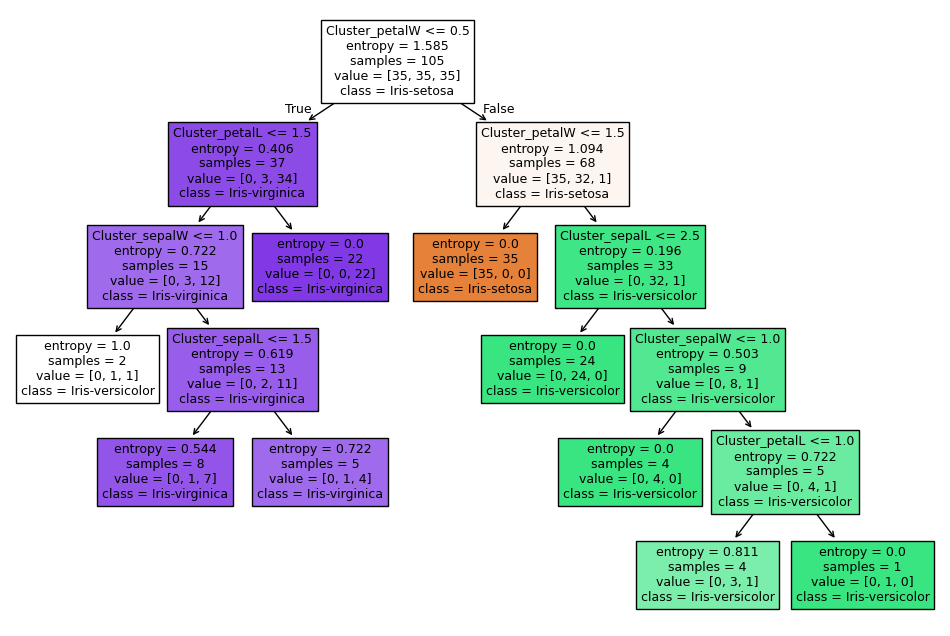

In [129]:
plt.figure(figsize=(12, 8))
plot_tree(modelDT_Kategori, feature_names=fitur_kategorikal, class_names=modelDT_Kategori.classes_, filled=True)
plt.show()

#### Naive Bayes dengan Data Numerik

##### Persiapkan data Numerik

In [130]:
# data dari database diambil dan dimasukkan ke DataFrame
data = pd.DataFrame(data_remove_class, columns=["id", "SepalLengthCM", "SepalWidthCM", "PetalLengthCM", "PetalWidthCM", "Species"])

# Mengambil fitur yang diperlukan dalam proses klasifikasi
X_numerik = data[["SepalLengthCM", "SepalWidthCM", "PetalLengthCM", "PetalWidthCM"]]
y = data["Species"]

##### Pisahkan Data yang mau digunakan untuk Training dan Testing

In [131]:
# split data untuk train sebesar 70% dan data test sebesar 30%
X_train_NB_Real, X_test_NB_Real, y_train_NB_Real, y_test_NB_Real = train_test_split(
    X_numerik, y, test_size=0.3, random_state=42, stratify=y
)

##### Latih Model Naive Bayes Numerik

Untuk data numerik, seperti panjang, lebar, atau suhu, Naive Bayes tidak lagi menghitung frekuensi langsung. Sebagai gantinya, algoritma ini menganggap bahwa nilai-nilai numerik pada setiap fitur menyebar mengikuti pola distribusi normal (seperti kurva lonceng).

Langkah awalnya tetap menghitung seberapa sering setiap kelas muncul. Setelah itu, untuk setiap fitur dalam tiap kelas, dihitung nilai rata-rata dan sebarannya (variansinya). Ini dilakukan karena untuk nilai-nilai numerik, kita butuh tahu seberapa "dekat" atau "jauh" suatu nilai dari pusat distribusinya.

Ketika memprediksi data baru, Naive Bayes akan menghitung seberapa besar kemungkinan nilai-nilai fitur tersebut muncul dalam distribusi kelas tertentu. Kemudian, semua kemungkinan itu dikombinasikan, dan kelas dengan total kemungkinan terbesar akan dipilih.

In [132]:
# train model menggunakan metode gaussian Naive Bayes
modelNBNumerik = GaussianNB()
modelNBNumerik.fit(X_train_NB_Real, y_train_NB_Real)

GaussianNB()

##### Clustering Setiap Data pada Classnya

In [133]:
# prediksi seluruh data setelah training
y_pred_NB_num = modelNBNumerik.predict(X_numerik)
# proses menampilkan data hasil predict
df['Prediksi_DT'] = y_pred_NB_num
df['SepalLengthCM'] = data['SepalLengthCM']
df['SepalWidthCM'] = data['SepalWidthCM']
df['PetalLengthCM'] = data['PetalLengthCM']
df['PetalWidthCM'] = data['PetalWidthCM']
selected_cols = [
    'ID',
    'SepalLengthCM', 'SepalWidthCM',
    'PetalLengthCM', 'PetalWidthCM'
]
if 'Prediksi_DT' in df.columns:
    selected_cols.append('Prediksi_DT')
print(tabulate(df[selected_cols], headers='keys', tablefmt='pretty'))

+-----+-------+---------------+--------------+---------------+--------------+-----------------+
|     |  ID   | SepalLengthCM | SepalWidthCM | PetalLengthCM | PetalWidthCM |   Prediksi_DT   |
+-----+-------+---------------+--------------+---------------+--------------+-----------------+
|  0  | ID001 |      5.1      |     3.5      |      1.4      |     0.2      |   Iris-setosa   |
|  1  | ID002 |      4.9      |     3.0      |      1.4      |     0.2      |   Iris-setosa   |
|  2  | ID003 |      4.7      |     3.2      |      1.3      |     0.2      |   Iris-setosa   |
|  3  | ID004 |      4.6      |     3.1      |      1.5      |     0.2      |   Iris-setosa   |
|  4  | ID005 |      5.0      |     3.6      |      1.4      |     0.2      |   Iris-setosa   |
|  5  | ID006 |      5.4      |     3.9      |      1.7      |     0.4      |   Iris-setosa   |
|  6  | ID007 |      4.6      |     3.4      |      1.4      |     0.3      |   Iris-setosa   |
|  7  | ID008 |      5.0      |     3.4 

##### Nilai Akurasi Data Numerik yang telah diTrain pada model Naive Bayes

In [134]:
# Akurasi pada seluruh data menggunakan library sklearn metrics
accuracy_all_NB_num = accuracy_score(y, y_pred_NB_num)
print(f"Nilai Akurasi: {accuracy_all_NB_num * 100:.2f}%")
print("="*50)
print("Laporan Klasifikasi:\n", classification_report(y, y_pred_NB_num))

Nilai Akurasi: 96.00%
Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.92      0.96      0.94        50
 Iris-virginica       0.96      0.92      0.94        50

       accuracy                           0.96       150
      macro avg       0.96      0.96      0.96       150
   weighted avg       0.96      0.96      0.96       150



#### Decision Tree dengan Data Numerik

##### Persiapkan Data Numerik

In [135]:
# data dari database diambil dan dimasukkan ke DataFrame
data = pd.DataFrame(data_remove_class, columns=["id", "SepalLengthCM", "SepalWidthCM", "PetalLengthCM", "PetalWidthCM", "Species"])

# Mengambil fitur yang diperlukan dalam proses klasifikasi
X_numerik = data[["SepalLengthCM", "SepalWidthCM", "PetalLengthCM", "PetalWidthCM"]]
y = data["Species"]

##### Pisahkan Data yang mau digunakan untuk Training dan Testing

In [136]:
# split data untuk train sebesar 70% dan data test sebesar 30%
X_train_DT_Real, X_test_DT_Real, y_train_DT_Real, y_test_DT_Real = train_test_split(
    X_numerik, y, test_size=0.3, random_state=42, stratify=y
)

##### Latih Model Decision Tree Numerik

Proses latih model ini menggunakan Library DecissionTreeClassifier dimana menggunakan perhitungan untuk mengecek kemurnian sebuah daerah menggunakan metode Entropy. Setelah menghitung nilai entropy, proses akan dilanjutkan untuk menghitung nilai split entropynya. Setiap fitur akan dicari nilai split entropynya dan dilanjutkan dengan perhitungan information gain, untuk mengukur seberapa baik titik pemisah yang akan dipilih.

In [137]:
# train model menggunakan metode entropy Decision Tree
modelDTNumerik = DecisionTreeClassifier(criterion='entropy', random_state=42)
modelDTNumerik.fit(X_train_DT_Real, y_train_DT_Real)

DecisionTreeClassifier(criterion='entropy', random_state=42)

##### Clustering Setiap Data pada Classnya

In [138]:
# prediksi seluruh data setelah training
y_pred_DT_num = modelDTNumerik.predict(X_numerik)
# proses menampilkan data hasil predict
df['Prediksi_DT'] = y_pred_DT_num
df['SepalLengthCM'] = data['SepalLengthCM']
df['SepalWidthCM'] = data['SepalWidthCM']
df['PetalLengthCM'] = data['PetalLengthCM']
df['PetalWidthCM'] = data['PetalWidthCM']
selected_cols = [
    'ID',
    'SepalLengthCM', 'SepalWidthCM',
    'PetalLengthCM', 'PetalWidthCM'
]
if 'Prediksi_DT' in df.columns:
    selected_cols.append('Prediksi_DT')
print(tabulate(df[selected_cols], headers='keys', tablefmt='pretty'))

+-----+-------+---------------+--------------+---------------+--------------+-----------------+
|     |  ID   | SepalLengthCM | SepalWidthCM | PetalLengthCM | PetalWidthCM |   Prediksi_DT   |
+-----+-------+---------------+--------------+---------------+--------------+-----------------+
|  0  | ID001 |      5.1      |     3.5      |      1.4      |     0.2      |   Iris-setosa   |
|  1  | ID002 |      4.9      |     3.0      |      1.4      |     0.2      |   Iris-setosa   |
|  2  | ID003 |      4.7      |     3.2      |      1.3      |     0.2      |   Iris-setosa   |
|  3  | ID004 |      4.6      |     3.1      |      1.5      |     0.2      |   Iris-setosa   |
|  4  | ID005 |      5.0      |     3.6      |      1.4      |     0.2      |   Iris-setosa   |
|  5  | ID006 |      5.4      |     3.9      |      1.7      |     0.4      |   Iris-setosa   |
|  6  | ID007 |      4.6      |     3.4      |      1.4      |     0.3      |   Iris-setosa   |
|  7  | ID008 |      5.0      |     3.4 

##### Nilai Akurasi Data Numerik yang telah diTrain pada model Decision Tree

In [139]:
# Akurasi pada seluruh data menggunakan library sklearn metrics
accuracy_all_DT_num = accuracy_score(y, y_pred_DT_num)
print(f"Nilai Akurasi: {accuracy_all_DT_num * 100:.2f}%")
print("="*50)
print("Laporan Klasifikasi:\n", classification_report(y, y_pred_DT_num))

Nilai Akurasi: 96.67%
Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.94      0.96      0.95        50
 Iris-virginica       0.96      0.94      0.95        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



##### Visualisasi data Numerik Menggunakan Decision Tree

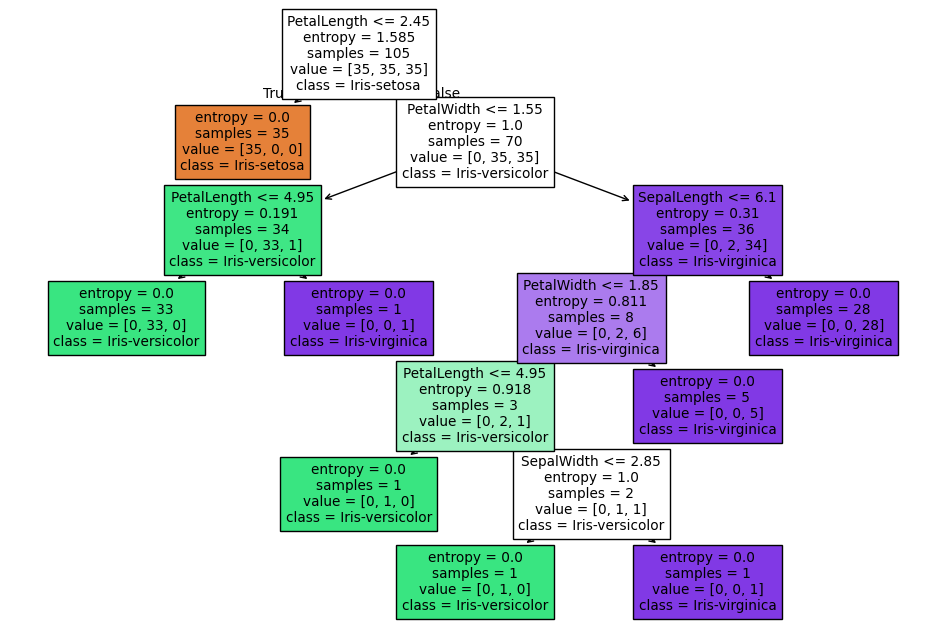

In [140]:
plt.figure(figsize=(12, 8))
fitur_Numerik = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
plot_tree(modelDTNumerik, feature_names=fitur_Numerik, class_names=modelDTNumerik.classes_, filled=True)
plt.show()

#### Kesimpulan dari Seluruh Proses Perhitungan

Berdasarkan hasil analisis dari setiap perhitungan dari kedua model klasifikasi yakni Naive Bayes dan Decission Tree bahwa, untuk data kategorikal dari kedua model menunjukkan nilai akurasi yang sama yakni 95,33% sedangkan nilai akurasi dari kedua model menggunakan data numerik menunjukkan nilai akurasi yang lebih tinggi dari data kategorikal dengan peningkatan sekitar 1% dan yang lebih tinggi pada klasifikasi menggunakan Decision Tree yakni sebesar 96,7% dibandingkan menggunakan Naive Bayes sebesar 96%.